<center><h1> 2D Wave Equation: Finite Difference Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation, rc
from IPython.display import HTML
%config InlineBackend.figure_format = 'retina'

<h3> Parameters

In [37]:
# Space parameters
Lx = 10       # x-dimension
Ly = 10       # y-dimension
dx = 0.1       # length of one element
dy = 0.1
Nx = int(Lx/dx) # number of x-elements (integer)
Ny = int(Ly/dy) # number of y-elements
Nel = Nx*Ny      # total number of elements

# Time parameters
T = 10         # total time
dt = 0.01      # timestep
Nt = int(T/dt) # number of timesteps (integer)

# Courant Stability
Cx = 1
Cy = 1
c = 1          # c = wave speed

<h3> Meshing

In [38]:
x0 = np.linspace(0, Lx, Nx)    # x-discretization
y0 = np.linspace(0, Ly, Ny)    # y-discretization

xmesh, ymesh = np.meshgrid(x0, y0)

<h3> Objective function: displacement

In [39]:
u = np.zeros((Nx, Ny, Nt))

<h3> Initial condition

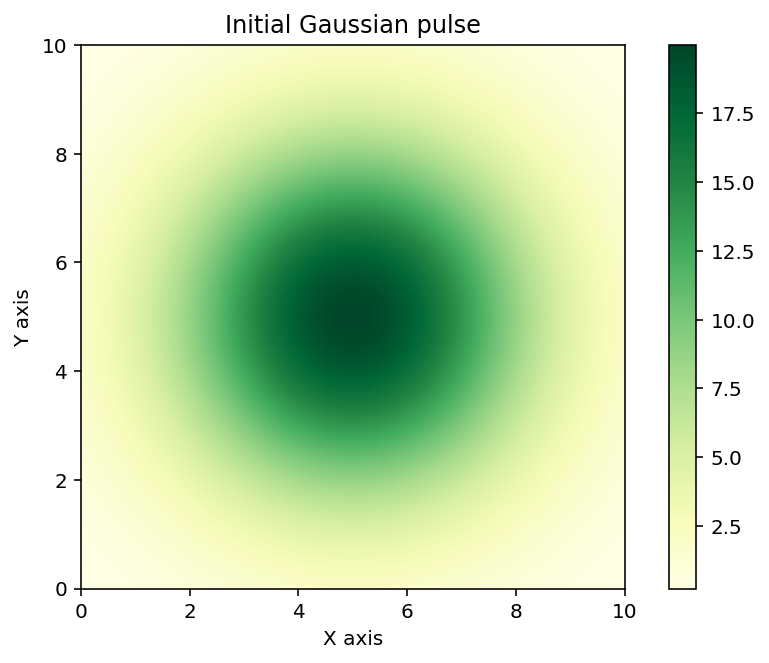

In [41]:
gauss = lambda x, mu, sig: ((x - mu)/2*sig)**2

A = 20    # amplitude
xo = 5    # x-mean
sigx = 0.6# x-std. deviation
yo = 5    # y-mean
sigy = 0.6# y-std. deviation

# Initial u (at t = 0)
uo = A*np.exp(-(gauss(xmesh, xo, sigx) + gauss(ymesh, yo, sigy)))

# Plot initial gaussian pulse
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

im = ax.imshow(uo, cmap = cm.YlGn, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("Initial Gaussian pulse")

plt.colorbar(im)
plt.show()

<h3> Time loop

In [56]:
# Initial condition
u[:,:,0] = uo

for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            DxDx = (u[x+1,y,0] - 2*u[x,y,0] + u[x-1,y,0])/(dx**2)
            DyDy = (u[x,y+1,0] - 2*u[x,y,0] + u[x,y-1,0])/(dy**2)
            
            u[x,y,1] = u[x,y,0] + 0.5*(((c*dt)**2)*(DxDx + DyDy))

t = 0
for t in range(1, Nt-1):
    
    # Inner points: central difference scheme
    for y in range(1,Ny-1):
        for x in range(1,Nx-1):
            
            DxDx = (u[x+1,y,t] - 2*u[x,y,t] + u[x-1,y,t])/(dx**2)
            DyDy = (u[x,y+1,t] - 2*u[x,y,t] + u[x,y-1,t])/(dy**2)
            
            u[x,y,t+1] = 2*u[x,y,t] + u[x,y,t-1] + (((c*dt)**2)*(DxDx + DyDy))
    
    # Dirichlet Boundary conditions
    u[0,:,t+1] = 0
    u[Lx,:,t+1] = 0
    u[:,0,t+1] = 0
    u[:,Ly,t+1] = 0

/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in double_scalars
/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in double_scalars
/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Users/prithvithakur/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


<h3> Plot results

In [47]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("2D wave equation")

im = ax.imshow(uo, cmap = cm.YlGn, vmin=abs(uo).min(), vmax=abs(uo).max(), \
               extent = [0, Lx, 0, Ly], interpolation='bilinear')

def init():
    #im.set_data([],[])
    return [im]

def animate(i):
    a = im.get_array()
    a = u[:,:,i]
    im.set_array(a)
    return [im]

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nt, interval=10, blit=True)
HTML(anim.to_html5_video())

rc('animation', html='html5')
anim